#loading the imdb dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

np.int64(1)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

#Transcribing reviews to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [ ]:
#Data preparation
#Multi-hot encoding of the integer sequences



In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#CREATE YOUR MODEL
#Define your model with three layers and sixty-four nodes. Utilizing the activation function "tanh" in place of "ReLU,"
#Because the ReLU function spans from 0 to infinity, it is not suitable for applications where negative values are essential.
###With zero serving as the midpoint and a range of -1 to +1, the Tanh function is effective for models with both positive and negative values.



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

#assembling the model


In [ ]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#validating the methodology
#reserving a validation set


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#model training

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.6669 - loss: 0.6696 - val_accuracy: 0.8659 - val_loss: 0.2663
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8659 - loss: 0.2357 - val_accuracy: 0.8118 - val_loss: 0.2070
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.8751 - loss: 0.1559 - val_accuracy: 0.8600 - val_loss: 0.1525
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8909 - loss: 0.1305 - val_accuracy: 0.8849 - val_loss: 0.1287
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9087 - loss: 0.1143 - val_accuracy: 0.8764 - val_loss: 0.1315
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9222 - loss: 0.1025 - val_accuracy: 0.8556 - val_loss: 0.1435
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9144 - loss: 0.1047 - val_accuracy: 0.8737 - val_loss: 0.1294
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9166 - loss: 0.1016 - val_accuracy: 0.8784 -

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#Plotting the training and validation loss


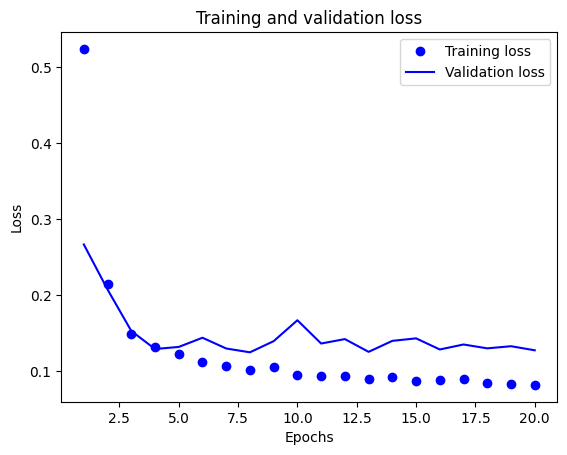

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plotting the training and validation accuracy


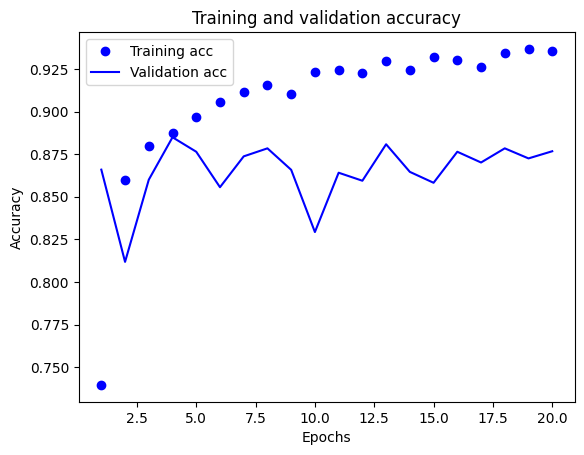

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8658 - loss: 0.1355


In [ ]:
results

[0.13438843190670013, 0.8673200011253357]

#The model with more nodes appears to be more stable, in my opinion.
#There are differences in the levels and functionalities of the models mentioned above. For each of these models, the training accuracy is still higher.
# By use many layers and the MSE loss function, I was able to obtain some of the best outcomes.



# Starting over while retraining a model

In [ ]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.7070 - loss: 0.5414
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8961 - loss: 0.1554
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9054 - loss: 0.1430
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9105 - loss: 0.1402
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8655 - loss: 0.1714


In [ ]:
results

[0.17051802575588226, 0.8673200011253357]